<a href="https://colab.research.google.com/github/VARSHAMG23/ML-Algorithms/blob/main/LinearRegression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data reading / manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning / modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Read CSV file
df=pd.read_csv('Insurance_data.csv')
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
# EDA
df.shape

(1338, 13)

In [5]:
# Null value elimination
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [8]:
df.dtypes

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
Claim_Amount,float64
past_consultations,float64
num_of_steps,float64
Hospital_expenditure,float64
NUmber_of_past_hospitalizations,float64


In [9]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [11]:
#remove null values
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=df[col].fillna(df[col].mode())
  else:
    df[col]=df[col].fillna(df[col].mean())

In [12]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [13]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [26]:
# df.drop_dupliactes(inplace=True) if any
df.dtypes
df['sex']

,sex
0,male
1,male
2,male
3,male
4,male
...,...
1333,female
1334,female
1335,male
1336,male


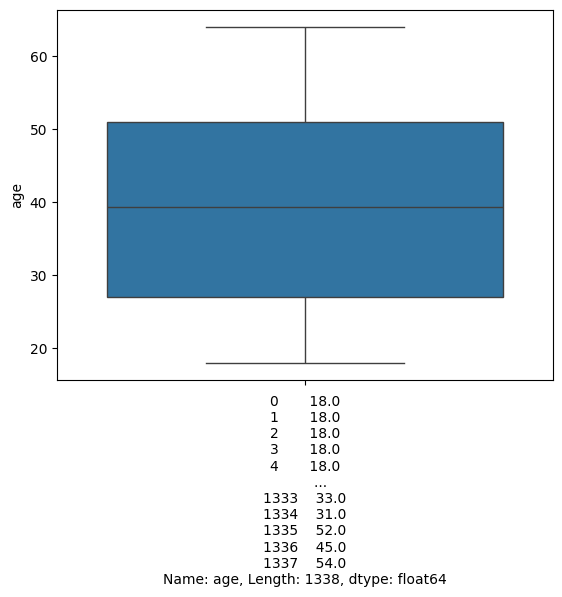

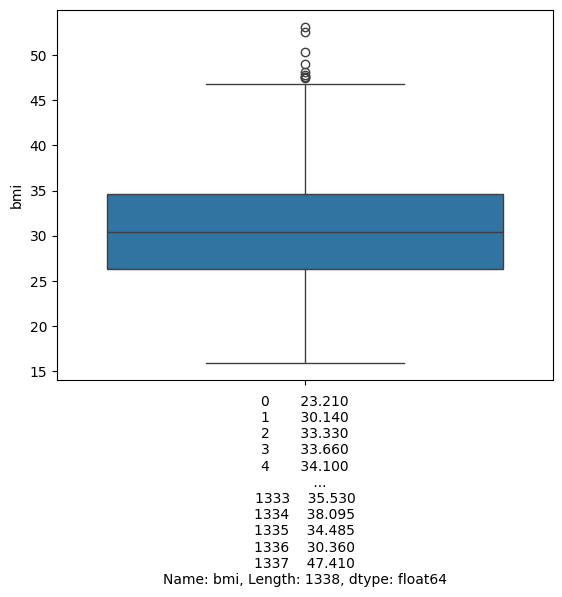

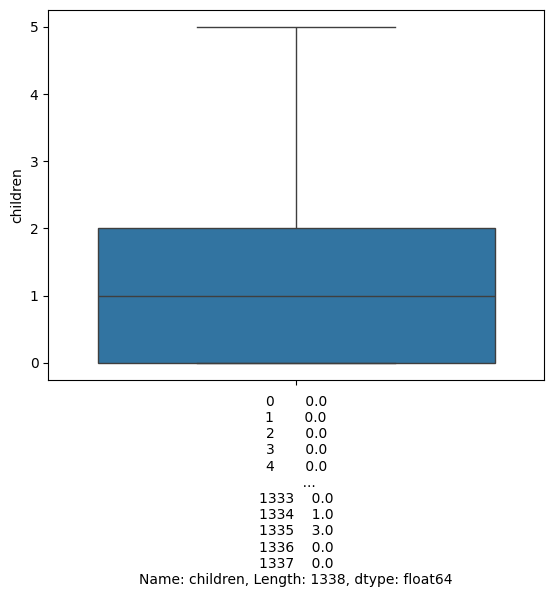

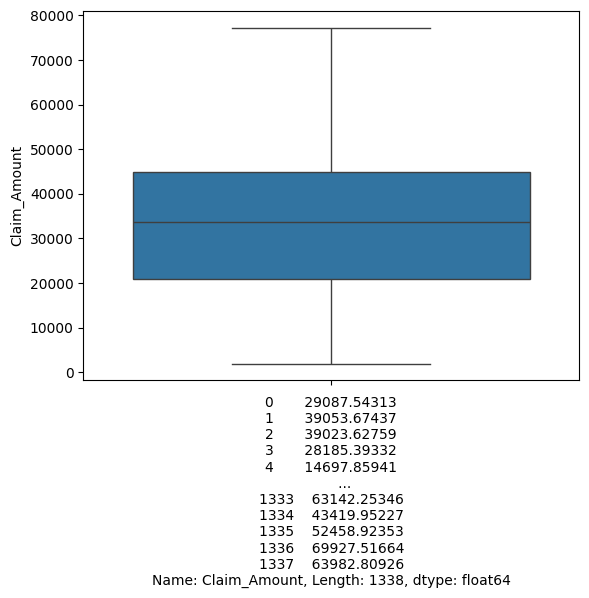

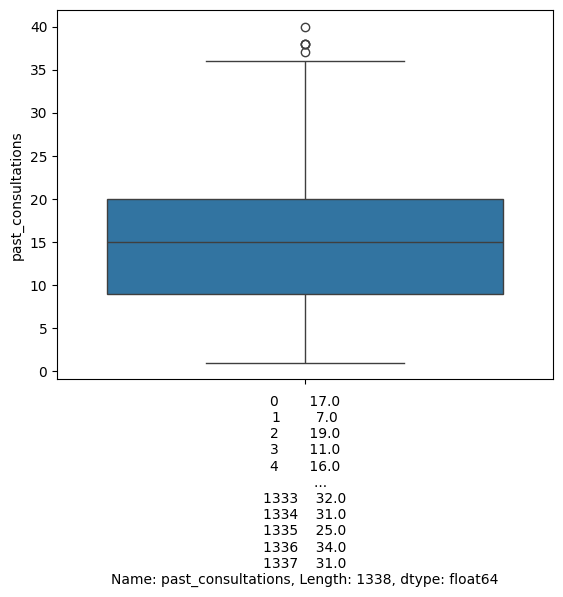

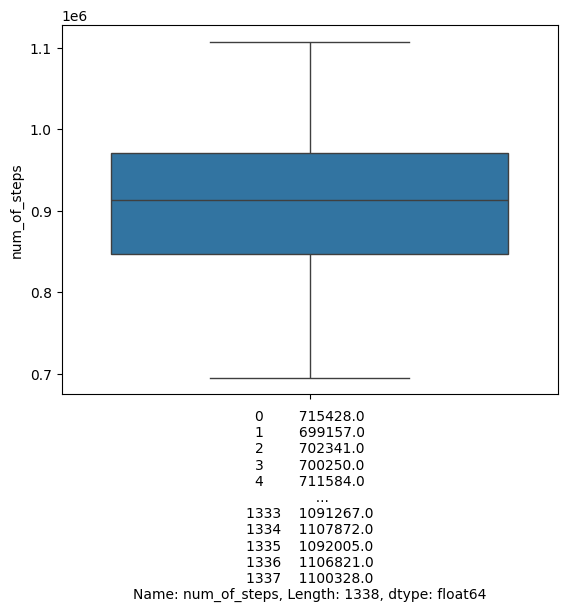

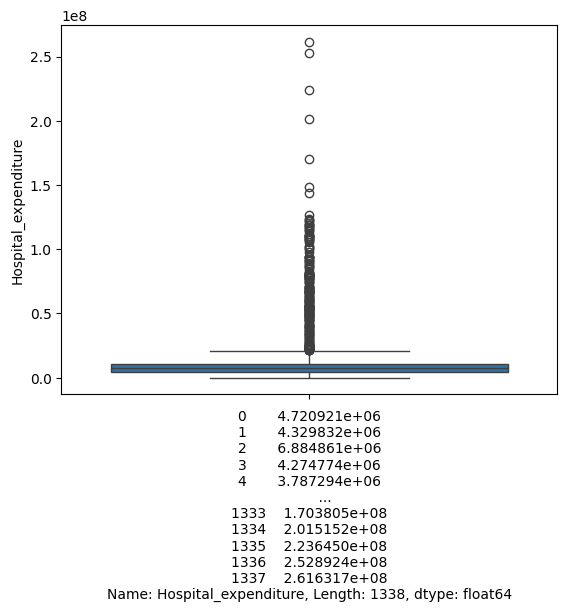

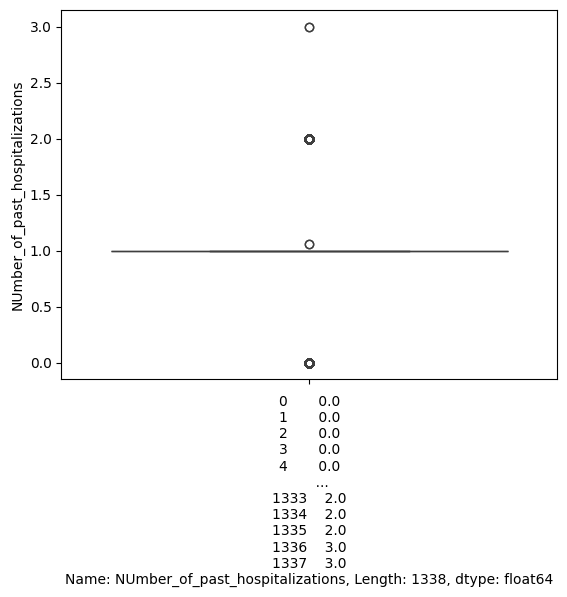

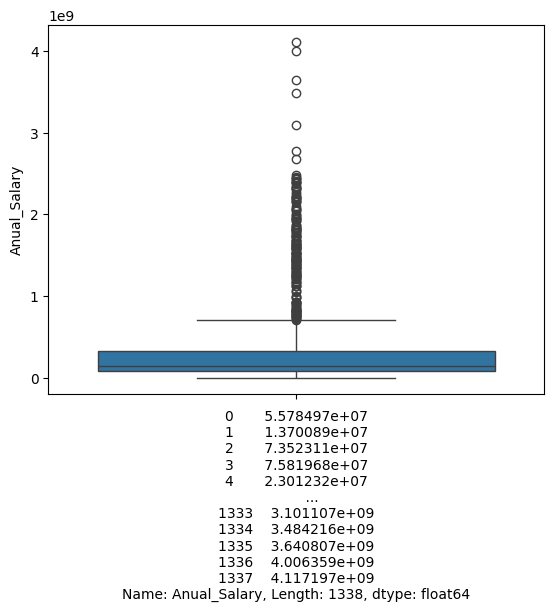

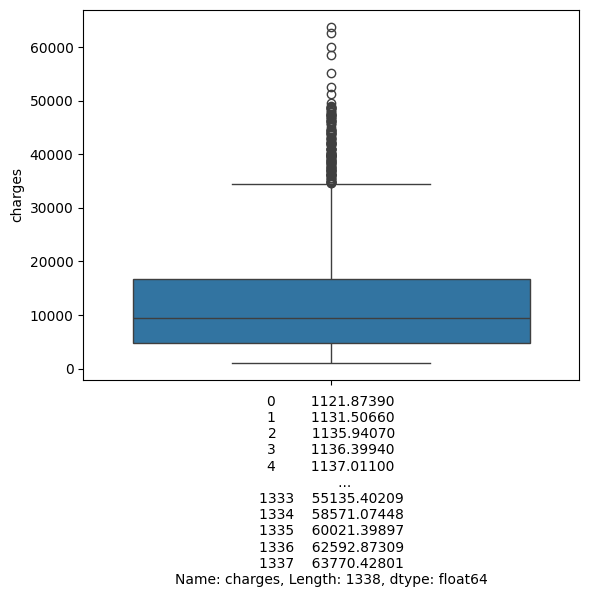

In [15]:
for col in df.columns:
  if df[col].dtype!='object':
    sns.boxplot(df[col])
    plt.xlabel(df[col])
    plt.show()

In [32]:
out_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR=Q3-Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]>=LB) & (df[col]<=UB)]

In [33]:
df.shape

(1030, 13)

In [34]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()



In [36]:
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=LE.fit_transform(df[col])

In [41]:
X=df.drop('charges',axis=1)
y=df['charges']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [51]:
lin_reg.coef_

array([ 4.28586706e+01, -1.38505730e+02, -8.66264453e+00,  3.98473824e+01,
        2.78843563e+03,  2.44826703e-03,  3.94648568e+00,  3.98914013e-02,
        1.70737394e-05, -1.38996721e+03,  1.63229456e-05, -2.24230453e+01])

In [54]:
lin_reg.intercept_

np.float64(-29774.172319140853)

In [46]:
y_pred=lin_reg.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
175,2775.19215,1321.350593
135,2362.22905,2891.862688
828,11830.60720,11342.960105
266,3987.92600,4214.213973
481,6666.24300,7301.449863
...,...,...
249,3757.84480,4537.090020
209,3227.12110,2550.442049
676,9487.64420,8850.891306
193,3046.06200,3658.074607


In [47]:
r2_score(y_test, y_pred) #r2_score of the model

0.967869606378572

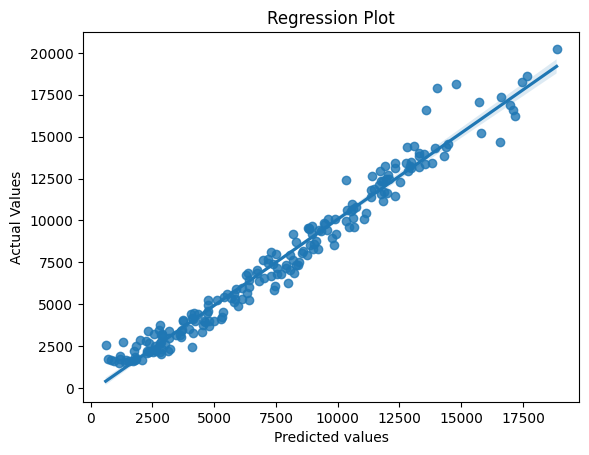

In [50]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.title('Regression Plot')
plt.show()